In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization

CURRENT_YEAR = 2023
MAX_YEAR = 2123
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.3054   | 5.307     | 5.513     | 8.125     |
| 4         | -0.2816   | 1.238     | 1.124     | 2.996     |
| 5         | -0.2699   | 2.429     | 5.39      | 7.434     |
| 11        | -0.2591   | 9.23      | 8.179     | 0.1372    |
| 14        | -0.1999   | 0.1397    | 2.058     | 2.393     |
| 26        | -0.1036   | 0.1148    | 4.433     | 0.9316    |
| 42        | -0.08154  | 0.0888    | 3.609     | 0.4776    |
| 43        | -0.0811   | 0.01      | 3.743     | 0.85      |
| 55        | -0.05599  | 0.01      | 4.111     | 0.9348    |
| 58        | -0.03946  | 0.4261    | 3.573     | 0.3047    |
| 69        | -0.03765  | 0.1527    | 3.57      | 0.5827    |
| 94        | -0.01745  | 0.3654    | 5.117     | 0.4693    |
Curve params found
{'push': 0.3653565985502094,
 'shift': 5.117263358694937,
 'slope': 0.46932640935831904}
-
## Chance of nonscalin

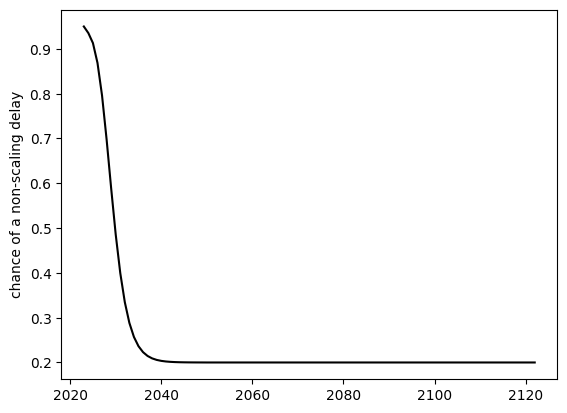

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 94%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 91%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 87%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 80%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 59%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 49%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 33%
Year: 2033

In [2]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.8),
                     (2030, 0.5),
                     (2035, 0.3),
                     (2050, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(3, 10)], [0.1, sq.lognorm(3, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 7         | -0.3162   | 4.099     | 5.073     | 0.2663    |
| 26        | -0.2569   | 0.2768    | 8.762     | 0.1701    |
| 43        | -0.03982  | 0.2522    | 8.864     | 0.7305    |
| 75        | -0.02622  | 0.1063    | 6.92      | 0.8594    |
| 104       | -0.01544  | 0.01      | 4.982     | 1.151     |
| 109       | -0.01373  | 0.0206    | 5.248     | 1.082     |
Curve params found
{'push': 0.02060006996939274,
 'shift': 5.248414977362825,
 'slope': 1.08218040785015}
-
## Chance of nonscaling delay ##


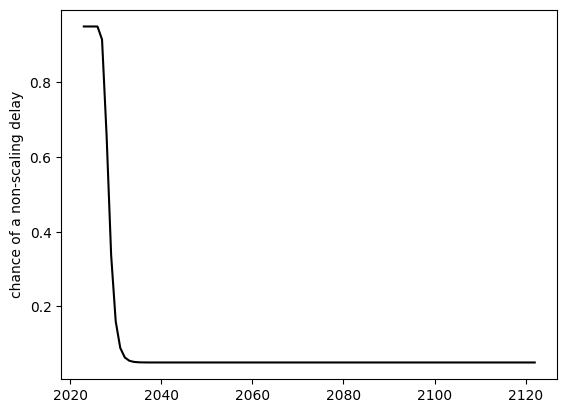

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 92%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 66%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 34%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2033 -

In [3]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.9),
                     (2030, 0.2),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 10)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.01806  | 0.3096    | 2.534     | 1.498     |
| 41        | -0.01667  | 0.01      | 4.532     | 3.291     |
| 43        | -0.01667  | 0.01      | 2.704     | 3.096     |
| 61        | -0.01658  | 0.01      | 1.454     | 1.7       |
| 63        | -0.01432  | 0.01      | 8.537     | 1.472     |
| 95        | -0.007829 | 0.01      | 1.834     | 1.057     |
Curve params found
{'push': 0.01, 'shift': 1.8338364794174624, 'slope': 1.0570450777940317}
-
## Chance of nonscaling delay ##


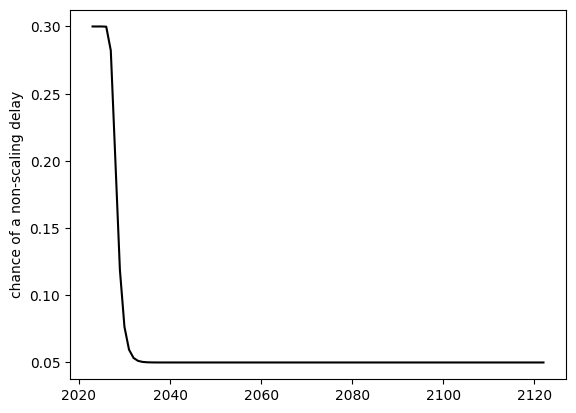

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 28%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - 

In [4]:
nonscaling_points = [(2023, 0.3),
                     (2030, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 10)],
                                                                        [0.1, sq.lognorm(5, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.03674  | 4.122     | 7.052     | 1.123     |
| 5         | -0.03517  | 4.068     | 9.955     | 7.455     |
| 7         | -0.02694  | 1.568     | 5.33      | 8.829     |
| 28        | -0.02111  | 0.542     | 1.571     | 0.6008    |
| 32        | -0.0167   | 0.3088    | 7.572     | 7.873     |
| 41        | -0.01667  | 0.01      | 6.237     | 6.183     |
| 45        | -0.01667  | 0.01      | 10.0      | 2.84      |
| 47        | -0.01666  | 0.01      | 3.449     | 1.982     |
| 77        | -0.01654  | 0.01      | 1.371     | 1.503     |
Curve params found
{'push': 0.01, 'shift': 1.370975991598833, 'slope': 1.5031475243681582}
-
## Chance of nonscaling delay ##


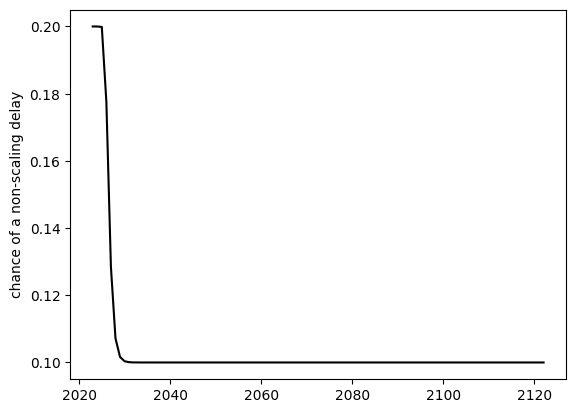

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

In [5]:
nonscaling_points = [(2023, 0.2),
                     (2030, 0.15),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.6, sq.lognorm(3, 10)],
                                                                                   [0.4, sq.lognorm(10, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Policy delay (e.g., pause)

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 4         | -0.03761  | 0.8601    | 9.617     | 2.307     |
| 27        | -0.03475  | 0.5334    | 6.817     | 7.197     |
| 42        | -0.03333  | 0.1236    | 9.938     | 4.972     |
| 43        | -0.03333  | 0.01      | 6.482     | 9.904     |
| 50        | -0.03333  | 0.01      | 5.584     | 3.788     |
| 69        | -0.03333  | 0.02125   | 7.782     | 3.377     |
| 77        | -0.03333  | 0.01      | 2.411     | 3.005     |
| 80        | -0.03333  | 0.01      | 10.0      | 2.983     |
| 103       | -0.03333  | 0.01      | 1.578     | 2.285     |
Curve params found
{'push': 0.01, 'shift': 1.5776079013660451, 'slope': 2.2848175175077805}
-
## Chance of nonscaling delay ##


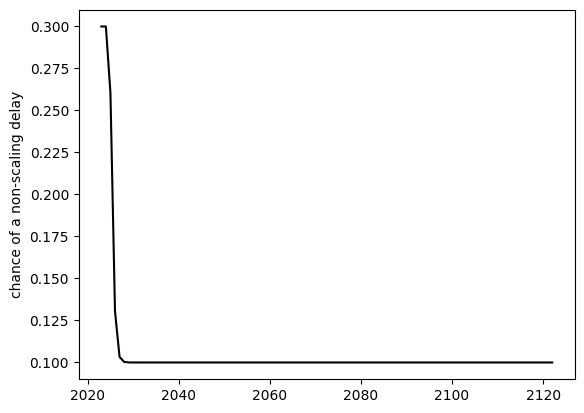

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 26%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

In [6]:
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 5)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['policy_pause']['length'] @ 1000, digits=0))

## Save

In [7]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!
